# Case study. Movielens
To use this code you'll have to extract the zip "movielens" in the Pandas folder.

In [1]:
!DIR
!DIR movielens

 El volumen de la unidad C es Sistema
 El número de serie del volumen es: 3278-9B8A

 Directorio de C:\Users\DAW2\Desktop\Machine Learning\Machine_Learning_2022\Jupyter Exercises\Pandas

11/10/2023  16:41    <DIR>          .
11/10/2023  16:41    <DIR>          ..
09/10/2023  18:57    <DIR>          .ipynb_checkpoints
11/10/2023  15:21    <DIR>          movielens
11/10/2023  16:41            52.045 movielens.ipynb
09/10/2023  18:57            39.971 pandas.ipynb
               2 archivos         92.016 bytes
               4 dirs  16.511.864.832 bytes libres
 El volumen de la unidad C es Sistema
 El número de serie del volumen es: 3278-9B8A

 Directorio de C:\Users\DAW2\Desktop\Machine Learning\Machine_Learning_2022\Jupyter Exercises\Pandas\movielens

11/10/2023  15:21    <DIR>          .
11/10/2023  15:21    <DIR>          ..
03/06/2019  12:49       323.544.381 genome-scores.csv
03/06/2019  12:35            18.103 genome-tags.csv
03/06/2019  12:35                 0 Icon_
03/06/2019  12

In [2]:
"""
The majority of data sets are stored in text files, and the way that these datas are ordered separated
with commas; so with the method "read_csv()" you have to pass the route first and then the separation 
character. This method will separate all these values and store them in dataframes.
"""
import pandas as pd
movies = pd.read_csv("movielens/movies.csv", sep=",")
tags = pd.read_csv("movielens/tags.csv", sep=",")
ratings = pd.read_csv("movielens/ratings.csv", sep=",")

# This is a new method ("head()"), it will show the first 15 rows.
print(movies.head(15))
movies.tail()


    movieId                               title  \
0         1                    Toy Story (1995)   
1         2                      Jumanji (1995)   
2         3             Grumpier Old Men (1995)   
3         4            Waiting to Exhale (1995)   
4         5  Father of the Bride Part II (1995)   
5         6                         Heat (1995)   
6         7                      Sabrina (1995)   
7         8                 Tom and Huck (1995)   
8         9                 Sudden Death (1995)   
9        10                    GoldenEye (1995)   
10       11      American President, The (1995)   
11       12  Dracula: Dead and Loving It (1995)   
12       13                        Balto (1995)   
13       14                        Nixon (1995)   
14       15             Cutthroat Island (1995)   

                                         genres  
0   Adventure|Animation|Children|Comedy|Fantasy  
1                    Adventure|Children|Fantasy  
2                                

,movieId,title,genres
27273,131254,Kein Bund für's Leben (2007),Comedy
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy
27275,131258,The Pirates (2014),Adventure
27276,131260,Rentun Ruusu (2001),(no genres listed)
27277,131262,Innocence (2014),Adventure|Fantasy|Horror


In [3]:
print(tags.head(30))
tags.tail()

    userId  movieId                                 tag   timestamp
0       18     4141                         Mark Waters  1240597180
1       65      208                           dark hero  1368150078
2       65      353                           dark hero  1368150079
3       65      521                       noir thriller  1368149983
4       65      592                           dark hero  1368150078
5       65      668                           bollywood  1368149876
6       65      898                    screwball comedy  1368150160
7       65     1248                       noir thriller  1368149983
8       65     1391                                mars  1368150055
9       65     1617                            neo-noir  1368150217
10      65     1694                               jesus  1368149925
11      65     1783                       noir thriller  1368149983
12      65     2022                               jesus  1368149925
13      65     2193                             

,userId,movieId,tag,timestamp
465559,138446,55999,dragged,1358983772
465560,138446,55999,Jason Bateman,1358983778
465561,138446,55999,quirky,1358983778
465562,138446,55999,sad,1358983772
465563,138472,923,rise to power,1194037967


In [4]:
# MovieId is linked with the tags dataframe.
print(ratings.head())
ratings.tail()

   userId  movieId  rating   timestamp
0       1        2     3.5  1112486027
1       1       29     3.5  1112484676
2       1       32     3.5  1112484819
3       1       47     3.5  1112484727
4       1       50     3.5  1112484580


,userId,movieId,rating,timestamp
20000258,138493,68954,4.5,1258126920
20000259,138493,69526,4.5,1259865108
20000260,138493,69644,3.0,1260209457
20000261,138493,70286,5.0,1258126944
20000262,138493,71619,2.5,1255811136


In [5]:
# For now we'll delete the timestamp columns in tags and ratings.
del ratings["timestamp"]
del tags["timestamp"]

In [6]:
ratings.head()

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5


# Operating with Series

In [7]:
# Let's extract a row and confirm that we did a Serie indeed.
row_0 = tags.iloc[0]
type(row_0)

pandas.core.series.Series

In [8]:
print(row_0)

userId              18
movieId           4141
tag        Mark Waters
Name: 0, dtype: object


In [9]:
row_0.index

Index(['userId', 'movieId', 'tag'], dtype='object')

In [10]:
row_0["userId"]

18

In [11]:
"rating" in row_0

False

# Operating with DataFrames

In [12]:
ratings.columns

Index(['userId', 'movieId', 'rating'], dtype='object')

In [13]:
"""
This method is so important, because we can see how a particular column is behaving.
It calculates how many data it has, the mean, the standard deviation, minimum, etc.
Also it gives you the data type (float64 in this case).
"""
ratings["rating"].describe()

count    2.000026e+07
mean     3.525529e+00
std      1.051989e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [14]:
# In the "tags" DataFrame we'll extract the row 0, 21 and 2005. 
tags.iloc[ [0, 21, 2005] ]

,userId,movieId,tag
0,18,4141,Mark Waters
21,65,6874,dark hero
2005,910,97938,stranded


# Analizing the most basic stat of the set.

In [15]:
ratings["rating"].describe()

count    2.000026e+07
mean     3.525529e+00
std      1.051989e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [16]:
ratings.describe()

,userId,movieId,rating
count,2.000026e+07,2.000026e+07,2.000026e+07
mean,6.904587e+04,9.041567e+03,3.525529e+00
std,4.003863e+04,1.978948e+04,1.051989e+00
min,1.000000e+00,1.000000e+00,5.000000e-01
25%,3.439500e+04,9.020000e+02,3.000000e+00
50%,6.914100e+04,2.167000e+03,3.500000e+00
75%,1.036370e+05,4.770000e+03,4.000000e+00
max,1.384930e+05,1.312620e+05,5.000000e+00


In [17]:
# I can also calculate only the mean value from a Serie if I wish.
ratings["rating"].mean()

3.5255285642993797

In [18]:
# Or directly the entire DataFrame mean.
ratings.mean()

userId     69045.872583
movieId     9041.567330
rating         3.525529
dtype: float64

In [19]:
ratings["rating"].min()

0.5

In [20]:
ratings["rating"].max()

5.0

In [21]:
ratings["rating"].std()

1.051988919275684

In [22]:
# This value is the most used value of a column (rating in this case).
ratings["rating"].mode()

0    4.0
Name: rating, dtype: float64

In [23]:
"""
This method allows to observe a possible correlation between a specific column and the other ones
A negative correlation would be an inverse corr.
A positive correlation would be a direct corr.
Could this column (features) possibly have a correlation?
"""
#ratings["testing"] = ratings["rating"] * 0.0000000000001
ratings.corr()

,userId,movieId,rating
userId,1.000000,-0.000850,0.001175
movieId,-0.000850,1.000000,0.002606
rating,0.001175,0.002606,1.000000


In [24]:
"""
We're exploring and analizing our dataset, something foundamental in order to
manage our machine learning system forward.
Let's be careful about not feeding this system with missinformation, in this case
we'll handle it with filters.
"""
filter_1 = ratings["rating"] > 5
print(filter_1)
filter_1.any()

0           False
1           False
2           False
3           False
4           False
            ...  
20000258    False
20000259    False
20000260    False
20000261    False
20000262    False
Name: rating, Length: 20000263, dtype: bool


False

# Data cleaning

In [25]:
movies.shape

(27278, 3)

In [26]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [27]:
# Let's search for null values
movies.isnull().any()

movieId    False
title      False
genres     False
dtype: bool

Nice, we don't have null values in movies...

In [28]:
ratings.isnull().any()

userId     False
movieId    False
rating     False
dtype: bool

In [29]:
tags.isnull().any()

userId     False
movieId    False
tag         True
dtype: bool

In [30]:
# Shit in the tag column there are null values...
count = tags.shape[0]
print("The quantity of rows before deleting is: ", count)

The quantity of rows before deleting is:  465564


In [31]:
# Let's delete the rows that have a null value with method "dropna()".
tags = tags.dropna()
print (count - tags.shape[0], "rows have been deleted.")

16 rows have been deleted.


In [32]:
# Double checking...
print(tags.isnull().any())
ratings["rating"].describe()

userId     False
movieId    False
tag        False
dtype: bool


count    2.000026e+07
mean     3.525529e+00
std      1.051989e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

# Graphing with pandas is easy

C:\Users\DAW2\AppData\Local\Temp\ipykernel_4776\151391098.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-dark-palette")


array([[<Axes: title={'center': 'rating'}>]], dtype=object)

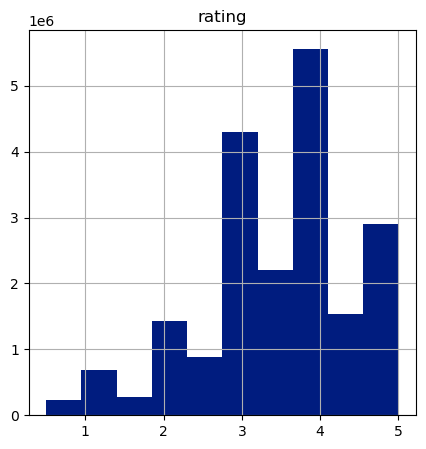

In [33]:
import matplotlib.pyplot as plt

# Dark background
plt.style.use("seaborn-dark-palette")
# http://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html
"""
Let's keep working with the ratings dataframe.. With the "hist()" method we can
draw a historygram graphically with the frequency of values appearing in a column
"""
ratings.hist(bins = 10, column="rating", figsize=(5,5))

array([[<Axes: title={'center': 'rating'}>]], dtype=object)

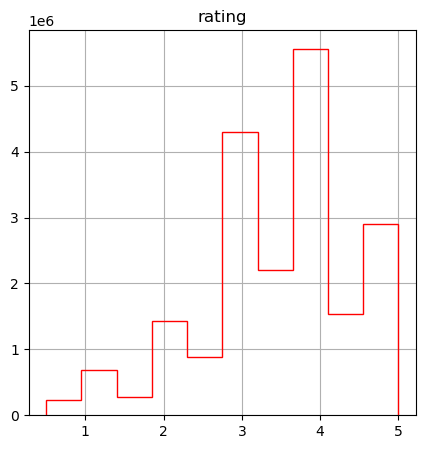

In [37]:
ratings.hist(bins = 10, column="rating", figsize=(5,5), histtype="step", color="red")

<Axes: >

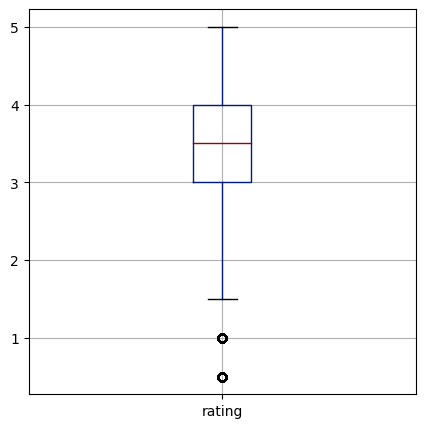

In [38]:
"""
boxplot: you can see both quartil's end (Q1, 25% data and Q3, 75% data) 
and also the average (Q3 - Q1, 50% data) of both.
"""
ratings.boxplot(column="rating", figsize=(5,5))

<img src="https://upload.wikimedia.org/wikipedia/commons/2/25/Boxplot.svg" style="background:white">

# Selecting columns

In [40]:
tags.head()

,userId,movieId,tag
0,18,4141,Mark Waters
1,65,208,dark hero
2,65,353,dark hero
3,65,521,noir thriller
4,65,592,dark hero


In [42]:
movies[ ["title", "genres"]].head()

,title,genres
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,Jumanji (1995),Adventure|Children|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama|Romance
4,Father of the Bride Part II (1995),Comedy


In [45]:
# Last 10 rows
print(ratings[-10:])
ratings.tail(10)

          userId  movieId  rating
20000253  138493    60816     4.5
20000254  138493    61160     4.0
20000255  138493    65682     4.5
20000256  138493    66762     4.5
20000257  138493    68319     4.5
20000258  138493    68954     4.5
20000259  138493    69526     4.5
20000260  138493    69644     3.0
20000261  138493    70286     5.0
20000262  138493    71619     2.5


,userId,movieId,rating
20000253,138493,60816,4.5
20000254,138493,61160,4.0
20000255,138493,65682,4.5
20000256,138493,66762,4.5
20000257,138493,68319,4.5
20000258,138493,68954,4.5
20000259,138493,69526,4.5
20000260,138493,69644,3.0
20000261,138493,70286,5.0
20000262,138493,71619,2.5


In [47]:
# This will count how many times a unique value appears.
tag_counts = tags["tag"].value_counts()
print(type(tag_counts))
tag_counts.head()

<class 'pandas.core.series.Series'>


sci-fi             3384
based on a book    3281
atmospheric        2917
comedy             2779
action             2657
Name: tag, dtype: int64

In [49]:
movies[["title", "genres"]].head()

,title,genres
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,Jumanji (1995),Adventure|Children|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama|Romance
4,Father of the Bride Part II (1995),Comedy


In [52]:
print(movies[-10:])
movies.tail()

       movieId                                              title  \
27268   131241                           Ants in the Pants (2000)   
27269   131243                Werner - Gekotzt wird später (2003)   
27270   131248                              Brother Bear 2 (2006)   
27271   131250                              No More School (2000)   
27272   131252  Forklift Driver Klaus: The First Day on the Jo...   
27273   131254                       Kein Bund für's Leben (2007)   
27274   131256                      Feuer, Eis & Dosenbier (2002)   
27275   131258                                 The Pirates (2014)   
27276   131260                                Rentun Ruusu (2001)   
27277   131262                                   Innocence (2014)   

                                            genres  
27268                               Comedy|Romance  
27269                             Animation|Comedy  
27270  Adventure|Animation|Children|Comedy|Fantasy  
27271                       

,movieId,title,genres
27273,131254,Kein Bund für's Leben (2007),Comedy
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy
27275,131258,The Pirates (2014),Adventure
27276,131260,Rentun Ruusu (2001),(no genres listed)
27277,131262,Innocence (2014),Adventure|Fantasy|Horror


<Axes: >

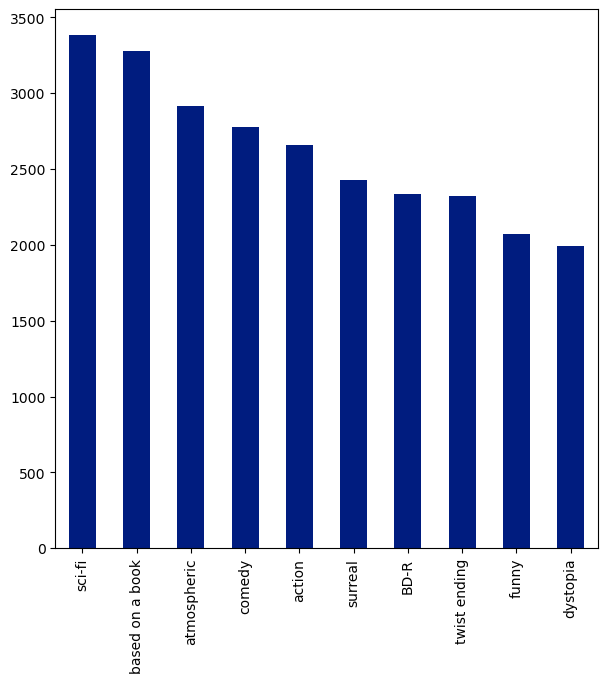

In [54]:
tag_counts[:10].plot(kind="bar", figsize=(7,7))